# Obtención de la constante de Hubble
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
%pylab inline
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import scipy.stats as st
import math
import random
from scipy.optimize import fmin
from cycler import cycler
#plt.style.use('ggplot')
plt.style.use('classic')
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


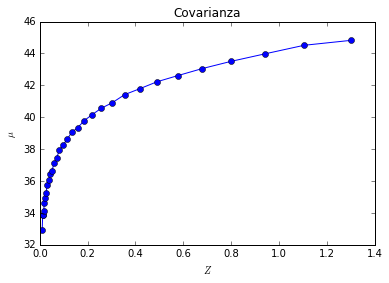

In [2]:
# Abrimos el arch. que contiene los datos 
f1=np.loadtxt('jla_mub_covmatrix.txt',delimiter = '\t',skiprows=0,usecols=[0,0]) 
f2=np.loadtxt('jla_mub.txt',delimiter = '\t',skiprows=0,usecols=[0,1]) 
covmatrix=f1[:,0]
z=f2[:,0]
mud=f2[:,1]
n=np.size(covmatrix) # Contabilizamos el número de datos que tenemos
plt.plot(z,mud,'bo', linestyle='-')
plt.title("Covarianza")
plt.xlabel("$Z$")
plt.ylabel("$\mu$")
plt.show()

In [3]:
cov=np.ones((31, 31))
m=0
for i in range(31):
    for j in range(31):
        cov[i][j]=covmatrix[m]
        m=m+1
var=np.diag(cov)

### Haciendo uso del logaritmo de la función maximizada de Likelihood

$-Ln(\mathfrak{L}(\vec{x},\vec{y}\mid \vec{\theta }))\propto \frac{1}{2}\sum_{i}^{n}\left ( \frac{y_{i}-\lambda (x_{i},\vec{\theta })}{\sigma_{i}} \right )^{2}$

In [4]:
# Prueba de la variable de materia
def test(om1,om0):
    test2=1
    while(test2):
        if(om1<0):
            om1=np.random.normal(om0,sigma)
            if(om1>1):
                om1=om0
        else:
            if(om1>1):
                om1=om0
            else:
                test2=0
    return(om1)

def eta(a,om):
    s3=(1.-om)/om
    s2=s3**(2./3)
    s=s3**(1./3)
    coef=[0.1540,0.4304,0.19097,0.066941]
    return 2.*np.sqrt(s3+1.)*((1./a**4)-coef[0]*s*(1./a**3)+coef[1]*s2*(1./a**2)+coef[2]*s3*(1./a)+coef[3]*(s**4))**(-1./8)
# Definición del likelihood
def likelihood(H,om,z,y,var):
    n=np.size(var)
    c=299792.0 # velocidad de la luz en km/s
    a=1./(1+z)
    D=(c/H)*(1./a)*(eta(1.,om)-eta(a,om))
    x= 25.-5.*np.log10(H/100.0)+5.*np.log10(D)
    arg=sum((((y-x)**2)/var))
    lhood=0.5*arg
    return lhood

### Múltiples caminadores 

In [5]:
def funLike(om0,H0,m):
    # Parámetros iniciales de convergencia
    global sol1, sol2
    random.seed(1)
    sigma=.2
    sol1=np.zeros(m)
    sol2=np.zeros(m)
    pasos=np.zeros(m)
    v=[H0,om0]
    for i in range(m):
        pasos[i]=i
        H0=v[0]
        om0=v[1]
        H1=np.random.normal(v[0],sigma/2.)
        om1=np.random.normal(v[1],sigma/100.)
        om1=test(om1,om0)
        y0 = likelihood(v[0],v[1],z,mud,var)
        y1 = likelihood(H1,om1,z,mud,var)
        ratio=y0/y1
        if(y1<y0):
            H0=H1
            om0=om1
        else:
            err = np.exp(-ratio)
            prob= random.randint(0,1)
            if(err>prob):
                H0=H1
                om0=om1
        v=[H0,om0]
        sol1[i]=v[0]
        sol2[i]=v[1]
    print('Las soluciones son:',H0,om0)
    #plt.style.use('ggplot')
    #plt.plot(sol1,sol2,'.')
    #plt.title('Constante de Hubble')
    #plt.xlabel("$H_{o}$")
    #plt.ylabel("$\Omega_{m}$")
    #plt.show()

In [6]:
funLike(.2,55,5000)
x1=sol1
y1=sol2
funLike(.3,50,5000)
x2=sol1
y2=sol2
funLike(.3,70,5000)
x3=sol1
y3=sol2
funLike(.2,80,5000)
x4=sol1
y4=sol2

('Las soluciones son:', 84.1718450593088, 0.28663472374367316)
('Las soluciones son:', 83.95291848644796, 0.2863588917881201)
('Las soluciones son:', 83.32880130501859, 0.3042319779565936)
('Las soluciones son:', 84.13812219529022, 0.26980748459328896)


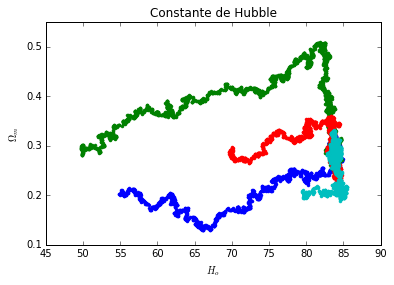

In [7]:
#plt.style.use('default')
plt.plot(x1,y1,'.')
plt.plot(x2,y2,'.')
plt.plot(x3,y3,'.')
plt.plot(x4,y4,'.')
plt.title('Constante de Hubble')
plt.xlabel("$H_{o}$")
plt.ylabel("$\Omega_{m}$")
plt.show()

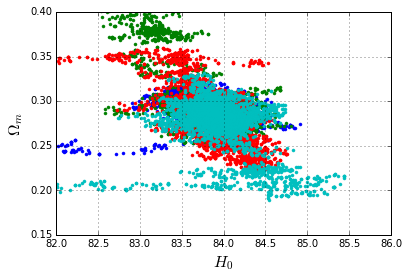

In [8]:
# Zona de convergencia
plt.plot(x1, y1,'.')
plt.plot(x2, y2,'.')
plt.plot(x3, y3,'.')
plt.plot(x4, y4,'.')
plt.axis([82, 86,0.15, 0.4])
plt.xlabel('$H_0$', fontsize = 16)
plt.ylabel('$\Omega_{m}$', fontsize = 16)
plt.grid(True)

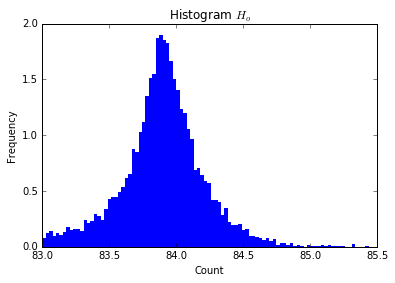

In [9]:
sol=[]
for i in range(np.size(x1)):
    number=1
    if(x1[i]>83):
        sol.append(x1[i])
for i in range(np.size(x2)):
    if(x2[i]>83):
        sol.append(x2[i])
for i in range(np.size(x3)):
    if(x3[i]>83):
        sol.append(x3[i])
for i in range(np.size(x4)):
    if(x4[i]>83):
        sol.append(x4[i])
sol=np.array(sol)
plt.hist(sol, bins='auto', normed = True, facecolor='blue', edgecolor='none')
plt.title("Histogram $H_{o}$")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

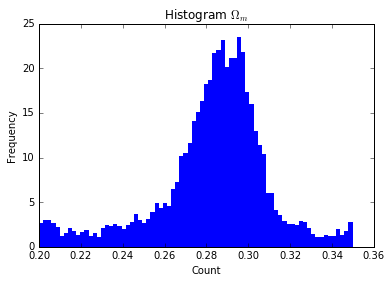

In [10]:
sol2=[]
for i in range(np.size(y1)):
    number=1
    if(y1[i]>.2 and y1[i]<.35 ):
        sol2.append(y1[i])
for i in range(np.size(y2)):
    if(y2[i]>.2 and y2[i]<.35):
        sol2.append(y2[i])
for i in range(np.size(y3)):
    if(y3[i]>.2 and y3[i]<.35):
        sol2.append(y3[i])
for i in range(np.size(y4)):
    if(y4[i]>.2 and y4[i]<.35):
        sol2.append(y4[i])
sol2=np.array(sol2)
plt.hist(sol2, bins='auto', normed = True, facecolor='blue', edgecolor='none')
plt.title("Histogram $\Omega_{m}$")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()